# Produzindo o modelo

Agora, vamos criar e treinar o nosso modelo de fato.

Vamos pegar os dados exportados na fase de análise

Vamos pegar a MLP desenvolvida

Vamos juntar tudo e fazer um modelo que reconhece comandos sonoros.

### Ler os dados coletados

In [1]:
import pandas as pd
import os
import subprocess

from funcoes import arquivo_mais_recente
from math import inf as infinito

# ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# pegar o CSV mais recente no diretório 'csv'
arquivo = arquivo_mais_recente('csv')
assert os.path.isfile(arquivo)

dataset = pd.read_csv(arquivo)

# fazendo um shuffle nos dados, pra ficar em ordem aleatória
dataset = dataset.sample(frac=1).reset_index(drop=True)

dataset.head()

,classe,f_centro_gravidade,f_media,f_percentil99
0,0,1767.632394,0.158133,2.054805
1,0,1787.310829,0.048239,0.996071
2,1,1712.345729,0.111894,0.219335
3,2,1277.945069,0.250273,2.840464
4,1,1565.378913,0.348646,0.538169


In [2]:
# tirando a coluna 'classe' e convertendo para matriz
dados = dataset.loc[:, dataset.columns != 'classe'].as_matrix()

labels = dataset['classe'].as_matrix()

### Configurando o modelo

In [14]:
# quantidade de neurônios na camada de entrada
tam_entrada = len(dados[0])

# quantidade de neurônios na camada de saída
tam_saida = len(set(labels))

# Quantos neurônios tem em cada camada (sem contar o bias)
formato_rede = [tam_entrada, tam_saida, tam_saida]

# Variação mínima do erro como critério de parada
delta_erro_minimo = 0.00001

# Número máximo de iterações
max_iteracoes = 10000

In [4]:
# atualizando o código dentro de MLP.py, que é extraído de MLP.ipynb
subprocess.Popen(['ipython', 'nbconvert', '--to=python', 'MLP.ipynb'])

from MLP import *

### Treinamento

In [15]:
rede = gerar_rede(formato_rede)

erro_anterior = infinito

for _ in range(max_iteracoes):
    erros = []

    for dado in range(len(dados)):
        # Atualizar os pesos: joga dados[dado] na entrada, e propaga o erro
        # pra ajustar os pesos
        rede = forward_backward(rede, dados[dado], one_hot(labels[dado], tam_saida))

        # com os novos pesos, vamos ver o que ele prediz
        I, Y = forward(rede, dados[dado])
        d = one_hot(labels[dado], tam_saida)

        # vamos guardar o erro entre o que ele previu e o que é pra ser
        erros.append(erro_total(Y[-1], d))

    erro = sum(erros)/len(erros)
    
    if _ == 0:
        print("erro inicial: ", erro)
    if _ % (max_iteracoes / 10) == 0:
        print("erro medio: ", erro)
        
    if abs(erro - erro_anterior) <= delta_erro_minimo:
        break
        
    erro_anterior = erro
        
print("\nerro final: ",erro)

erro inicial:  0.6360468167787555
erro medio:  0.6360468167787555

erro final:  0.6314143964843996


### Testes

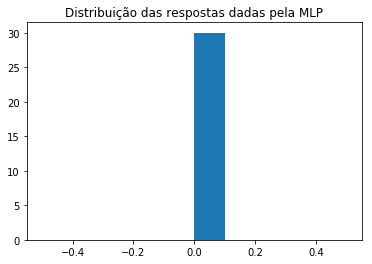

Acertou 33.3 %


In [29]:
certos = 0
errados = 0

resultados = []

for i in range(len(dados)):
    # vamos ver o que ele prediz
    resultado = predizer(rede, dados[i])
    resultados.append(resultado)
    if resultado == labels[i]:
        certos +=1
    else:
        errados +=1

# plt.figure(figsize=(1,1))
plt.hist(resultados)
plt.title("Distribuição das respostas dadas pela MLP")
plt.show()

print("Acertou %.1f %%" % (100*certos / (certos + errados)))



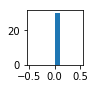

In [26]:
plt.figure(figsize=(1,1))
plt.hist(resultados)
plt.show()